In [1]:
import pickle
import analyzer
from analyzer.datasets import SampleManager

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from hist import Hist, new, axis

In [2]:
from analyzer.core import AnalysisResult

In [3]:
data = pickle.load(open("myoutput.pkl", "rb"))

In [3]:
s = SampleManager()

In [4]:
s.loadSamplesFromDirectory("datasets/")

In [5]:
s

SampleManager(sets={'TTToHadronic2018': TTToHadronic2018, 'DataSingleMuon2016': DataSingleMuon2016, 'Skim_QCDInclusive2018_HT300to500': Skim_QCDInclusive2018_HT300to500, 'Skim_QCDInclusive2018_HT500to700': Skim_QCDInclusive2018_HT500to700, 'Skim_QCDInclusive2018_HT700to1000': Skim_QCDInclusive2018_HT700to1000, 'Skim_QCDInclusive2018_HT1000to1500': Skim_QCDInclusive2018_HT1000to1500, 'Skim_QCDInclusive2018_HT1500to2000': Skim_QCDInclusive2018_HT1500to2000, 'Skim_QCDInclusive2018_HT2000toInf': Skim_QCDInclusive2018_HT2000toInf, 'Skim_WJetsToQQ2018_HT-200To400': Skim_WJetsToQQ2018_HT-200To400, 'Skim_WJetsToQQ2018_HT-400To600': Skim_WJetsToQQ2018_HT-400To600, 'Skim_WJetsToQQ2018_HT-600To800': Skim_WJetsToQQ2018_HT-600To800, 'Skim_WJetsToQQ2018_HT-800ToInf': Skim_WJetsToQQ2018_HT-800ToInf, 'Skim_ZJetsToQQ2018_HT-200To400': Skim_ZJetsToQQ2018_HT-200To400, 'Skim_ZJetsToQQ2018_HT-400To600': Skim_ZJetsToQQ2018_HT-400To600, 'Skim_ZJetsToQQ2018_HT-600To800': Skim_ZJetsToQQ2018_HT-600To800, 'Skim_

In [6]:
a = AnalysisResult.fromFile("myoutput.pkl")

m13_pt could be a NN parameter lol i'm never gonna look at this again

In [7]:
hists = a.getMergedHistograms(s)

In [57]:
background_data, background_edges = hists["m24_m"]["Skim_QCDInclusive2018",...].to_numpy()
signal_data, signal_edges = hists["m24_m"]["signal_312_1500_900",...].to_numpy()
sqrt_background_data_trimmed = np.sqrt(background_data)[5:]

In [61]:
def L2_norm(set):
    sum_of_squares = np.sum(np.power(set, 2))
    return np.sqrt(sum_of_squares)

In [68]:
def s_over_root_b(signal_hist, background_hist):
    signal_data = signal_hist.to_numpy()[0]
    background_data, edges = background_hist.to_numpy()
    sqrt_b = np.sqrt(background_data)
    result = np.nan_to_num(signal_data/sqrt_b)

    fig, ax = plt.subplots()
    bin_centers = (edges[:-1] + edges[1:])/2
    ax.set_xlabel("reconstructed... thing")
    ax.set_ylabel("$S/\sqrt{B}$")
    ax.set_title("Scatter plot of S/sqrt(B)")
    plt.scatter(bin_centers, result)

    return L2_norm(result)

/tmp/ipykernel_875951/3464002682.py:5: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


1.7392151277448622

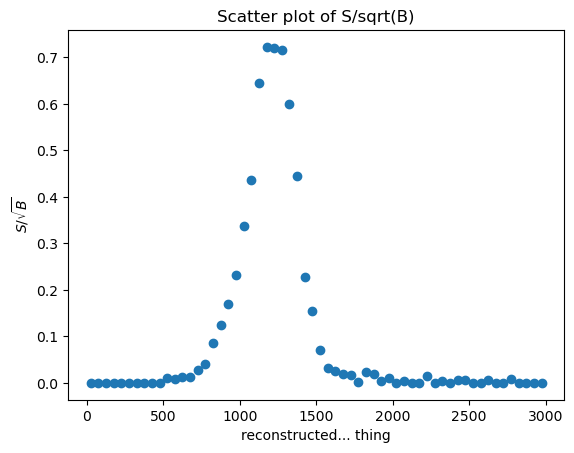

In [69]:
s_over_root_b(hists["m13_m"]["signal_312_1500_900",...], hists["m13_m"]["Skim_QCDInclusive2018",...])

In [10]:
hists["m13_m"]["signal_312_1500_900",...]

Hist(Regular(60, 0, 3000, name='$m_{3}$'), storage=Weight()) # Sum: WeightedSum(value=1534, variance=669.653)

In [11]:
from analyzer.plotting import PlotObject, drawAs1DHist
import matplotlib.pyplot as plt

In [24]:
background_style = s.getCollection("Skim_QCDInclusive2018").style
signal_style = s.getSet("signal_312_1500_900").style

In [25]:
background_obj = PlotObject.fromHist(hists["m13_m"]["Skim_QCDInclusive2018",...], style=background_style)
signal_obj = PlotObject.fromHist(hists["m13_m"]["signal_312_1500_900",...], style=signal_style)

<Axes: >

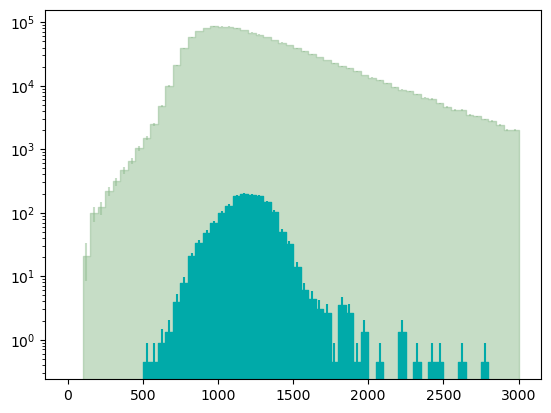

In [28]:
fig, ax = plt.subplots()
ax.set_yscale('log')
drawAs1DHist(ax, background_obj)
drawAs1DHist(ax, signal_obj)

In [32]:
sqrt_b = axis.transform.sqrt(hists["m13_m"]["Skim_QCDInclusive2018",...])

TypeError: 'Function' object is not callable

In [27]:
from analyzer.plotting import loadStyles
loadStyles()

<Axes: >

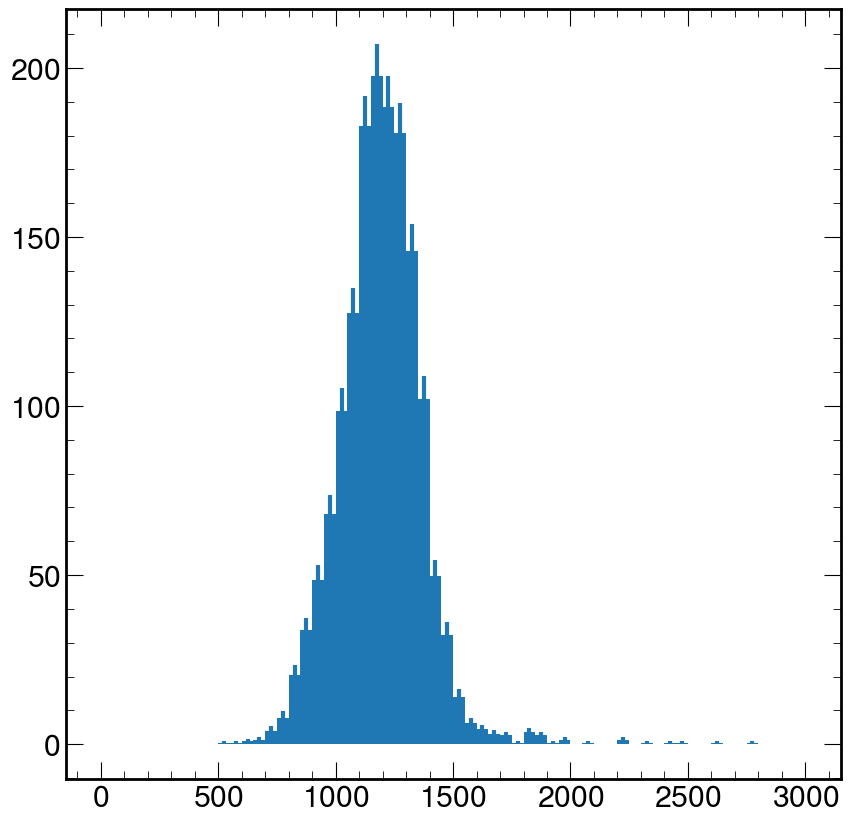

In [28]:
fig, ax = plt.subplots()
drawAs1DHist(ax, m13_m_hist_plotobj)